> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

in this report we explored data of tmdb movies through period 19960 to 2016
and try to answer some question :

1 What kinds of properties are associated with movies that have high revenues!

2- Which genres are most popular from year to year

3- What is the future of the film industry from one era to another

4- What is the most popular movie production month


In [45]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlibe inline
import os
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


UsageError: Line magic function `%` not found.


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

in this section we will work on TMBb movies Dataset This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
● Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.
● There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.
● The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time

**for More infromation about this data visit this** [link](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)


In [46]:
df=pd.read_csv("tmdb_movies.txt")


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [47]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [49]:
#we will replace all 0 value at dataset to null value then remove it by using drop method
df.replace(0,np.nan,inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 21 columns):
id                      1287 non-null int64
imdb_id                 1287 non-null object
popularity              1287 non-null float64
budget                  1287 non-null float64
revenue                 1287 non-null float64
original_title          1287 non-null object
cast                    1287 non-null object
homepage                1287 non-null object
director                1287 non-null object
tagline                 1287 non-null object
keywords                1287 non-null object
overview                1287 non-null object
runtime                 1287 non-null float64
genres                  1287 non-null object
production_companies    1287 non-null object
release_date            1287 non-null object
vote_count              1287 non-null int64
vote_average            1287 non-null float64
release_year            1287 non-null int64
budget_adj              1287 non-nu

In [50]:
# replace all null of homepage to not found 
df.homepage.fillna("Not_Found",inplace=True)

In [51]:
# check if any instance have 0 revenue in our data
sum(df.revenue==0)

0

In [52]:
# chnage release data from sting to data time 
df.release_date=pd.to_datetime(df.release_date)

In [53]:
# chek any duplicated rows
sum(df.duplicated())

0

In [54]:
'''
this function make filteration on columns which can be suitable for answering our question
input : not take nay arguement
process : drop and create some columns which can be suitable for answering our question
output : not return any value 
'''
def filter_col():
    #we will drop some columns which not be usefull for us
    df.drop(["id","imdb_id","cast","overview","tagline","keywords","production_companies"],inplace=True,axis=1)
    # create new column which have month name
    df["Month"]=df.release_date.dt.month_name()
    # create column contain vote average propotion
    total_vote_count=np.array(df.vote_count).sum()
    propotion_vote_count=np.array(df.vote_count)/total_vote_count
    df["vote_average_propotion"]=np.array(df.vote_average)*propotion_vote_count
    # create total budget and total revenue 
    df["total_budget"]=np.array(df.budget)+np.array(df.budget_adj)
    df["total_revenue"]=np.array(df.revenue)+np.array(df.revenue_adj)
filter_col()

In [55]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'homepage',
       'director', 'runtime', 'genres', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj', 'Month',
       'vote_average_propotion', 'total_budget', 'total_revenue'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.




## we will explore Data to Answer some question

### Research Question 1 (What kinds of properties are associated with movies that have high revenues!)

In [56]:
# measure of relationship among [popularity","runtime","vote_average_propotion] & revenue
x=["popularity","runtime","vote_average_propotion","budget"]
for feature in x:
    print("the correlation cofficient among revenue & {} = ".format(feature),df[feature].corr(df.revenue))
    
    


the correlation cofficient among revenue & popularity =  0.5947547264830623
the correlation cofficient among revenue & runtime =  0.37122591306845887
the correlation cofficient among revenue & vote_average_propotion =  0.7552467868121625
the correlation cofficient among revenue & budget =  0.7068884353090428


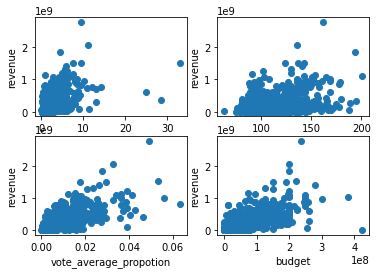

In [57]:
# make scatter plot among [popularity ,runtime ,vote_average_propotion ,budget]  and revenue
plt.subplot(2,2,1)
plt.scatter(x=df.popularity,y=df.revenue)
plt.xlabel("popularity")
plt.ylabel("revenue")
plt.subplot(2,2,2)
plt.scatter(x=df.runtime,y=df.revenue)
plt.xlabel("runtime")
plt.ylabel("revenue")
plt.subplot(2,2,3)
plt.scatter(x=df.vote_average_propotion,y=df.revenue)
plt.xlabel("vote_average_propotion")
plt.ylabel("revenue")
plt.subplot(2,2,4)
plt.scatter(x=df.budget,y=df.revenue)
plt.xlabel("budget")
plt.ylabel("revenue");


### Research Question 2  (Which genres are most popular from year to year)

In [58]:
ty_movies=["Action","Adventure","Comedy","Crime","Drama","Thriller","History","Mystery","Animation","Western","Fantasy","Family",
           "Horror","Music","Romance","Science Fiction","Documentary","Foreign","War"]

In [59]:
revenue_of_genres=[]
for value in ty_movies:
    revenue_of_genres.append((df[df.genres.str.contains("{}".format(value))]).revenue)
    

In [60]:
for count,value in enumerate(revenue_of_genres):
    print("average of {} = ".format(ty_movies[count]),value.mean()/1000000)

average of Action =  256.44080400481926
average of Adventure =  374.8261905892256
average of Comedy =  147.08416118599033
average of Crime =  118.84944787046632
average of Drama =  103.9240087775701
average of Thriller =  144.6964689774436
average of History =  103.93807877142856
average of Mystery =  142.1534446530612
average of Animation =  348.2914143240741
average of Western =  171.45374853846153
average of Fantasy =  379.5062526363636
average of Family =  325.0238051226994
average of Horror =  89.3533574676259
average of Music =  118.15858521052631
average of Romance =  116.91110040816326
average of Science Fiction =  275.1586576172249
average of Documentary =  26.032535133333333
average of Foreign =  0.187716
average of War =  143.7026729375


Text(0.5, 1.0, 'Average of genres of movies revenue though period 1960 to 2016')

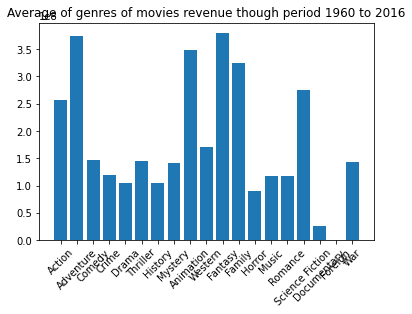

In [61]:
# make histogram for Average of genres of movies revenue through period 1960 to 2016
revenue_value_count=[value.mean() for value in revenue_of_genres]
index=np.arange(0,len(ty_movies))
plt.bar(index,revenue_value_count,tick_label=ty_movies)
plt.xticks(rotation=45);
plt.title("Average of genres of movies revenue through period 1960 to 2016")

Text(0.5, 1.0, 'Average of genres of movies revenue though period 1960 to 2016')

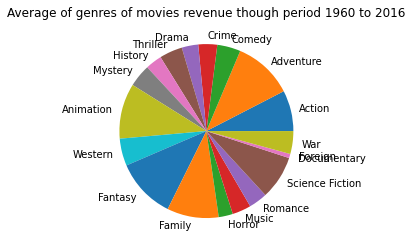

In [62]:
# make pieo chart for Average of genres of movies revenue through period 1960 to 2016
plt.pie(revenue_value_count, labels = ty_movies)
plt.title("Average of genres of movies revenue through period 1960 to 2016")

### Research Question 3  (What is the future of the film industry from one era to another)

Text(0.5, 1.0, 'Average of years revenue though period 1960 to 2016')

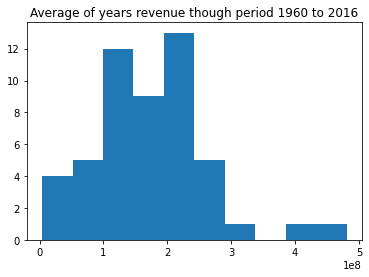

In [63]:
# make histogram for Average of years revenue through period 1960 to 2016
x=df.groupby(["release_year"])["revenue"].mean()
plt.hist(x,bins=10)
plt.title("Average of years revenue through period 1960 to 2016")

### Research Question 3  (What is the most popular movie production month)

In [64]:
months=df["Month"].value_counts()

In [65]:
indexs=np.arange(0,len(months.index))

Text(0.5, 1.0, 'Average of months revenue though period 1960 to 2016')

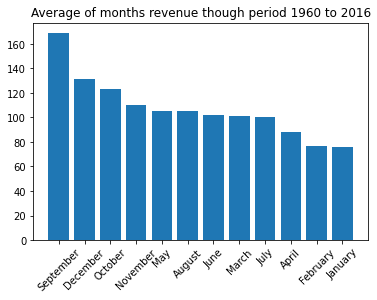

In [66]:
# make bar chart for number of months count through period 1960 to 2016
plt.bar(indexs,months.values,tick_label=months.index)
plt.xticks(rotation=45);
plt.title("number of months count through period 1960 to 2016")

Text(0.5, 1.0, 'Average of months revenue though period 1960 to 2016')

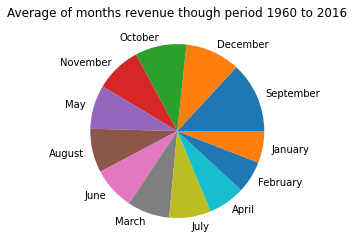

In [42]:
# make pieo chart for number of months count through period 1960 to 2016

plt.pie(months.values, labels = months.index)
plt.title("Average of months revenue through period 1960 to 2016")

<a id='conclusions'></a>
## Conclusions

### Results is our Data suggest that:

1- kinds of properties are associated with movies that have high revenues are vote_average_propotion,budget,popularity and runtime 

2- the most popular genres from year to year are each of Adventure ,Animation,fantasy and family 


3- the future of the film industry from one era to another, It represents a normal distribution, and this indicates that the film industry through the ages is not in a state of increase despite the advancement of filming mechanisms and the technology used for this Therefore, one of the most important factors in this may be the presence and advancement of Internet sites through which you can watch movies, We have come to this conclusion through
drawing histogram plot for all mean of revenue for each release_year

4- the most popular movie production month are eath of September and December

### limitation : there are a couple of limitation with our data

our statistics which used it are  descriptive statistics, not used inferential statistic which make us predict values which maybe happen in the future so we can't predict values of revenue by some related feature like vote_average_propotion,budget,popularity and runtime 



In [67]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

In [3]:
!export PATH=/Library/TeX/texbin:$PATH
jupyter nbconvert your_notebook.ipynb --to pdf


SyntaxError: invalid syntax (<ipython-input-3-4953255e4c8f>, line 2)